# Preprocessing Fase 2 (Data Preparation) – Prediksi Kesejahteraan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, Markdown

pd.set_option('display.max_columns', 120)
pd.set_option('display.float_format', '{:,.3f}'.format)
sns.set_theme(style='whitegrid')

DATA_PATH = Path(r"/media/boba/DATA/STT Wastukancana/SEMESTER 5/MACHINE LEARNINGGGGG/TUGAS/UAS/kesejahteraan/dataset/dataset_akhir/dataset_final.csv")
OUTPUT_PATH = Path(r"/media/boba/DATA/STT Wastukancana/SEMESTER 5/MACHINE LEARNINGGGGG/TUGAS/UAS/kesejahteraan/preprocessing/dataset_preprocessed.csv")

## 1. Load & Initial Exploration

In [2]:
print('Loading dataset...')
raw_df = pd.read_csv(DATA_PATH, index_col=False)
orig_shape = raw_df.shape
print(f'Dataset path: {DATA_PATH}')
print(f'Initial shape: {raw_df.shape}')
print(f'Initial columns: {raw_df.columns.tolist()}')

print('\nChecking for unnamed columns...')
unnamed_cols_load = [col for col in raw_df.columns if 'unnamed' in col.lower()]
if unnamed_cols_load:
    print(f"Found unnamed columns: {unnamed_cols_load}")
    raw_df = raw_df.drop(columns=unnamed_cols_load)
    print(f"Removed {len(unnamed_cols_load)} unnamed column(s)")
else:
    print('No unnamed columns found')

raw_df = raw_df.loc[:, ~raw_df.columns.str.contains('^Unnamed', case=False)]

print('\nStandardizing column names...')
original_cols = raw_df.columns.tolist()
raw_df.columns = raw_df.columns.str.strip()
raw_df.columns = raw_df.columns.str.lower()
raw_df.columns = raw_df.columns.str.replace(' ', '_')
raw_df.columns = raw_df.columns.str.replace('[^a-z0-9_]', '', regex=True)
raw_df.columns = raw_df.columns.str.replace('_+', '_', regex=True)

for old, new in zip(original_cols, raw_df.columns):
    if old != new:
        print(f"  '{old}' -> '{new}'")

assert not any('unnamed' in col.lower() for col in raw_df.columns), 'Still have unnamed columns after load'
print('✓ No unnamed columns after load')
print(f"Current columns: {raw_df.columns.tolist()}")

Loading dataset...


FileNotFoundError: [Errno 2] No such file or directory: '/media/boba/DATA/STT Wastukancana/SEMESTER 5/MACHINE LEARNINGGGGG/TUGAS/UAS/kesejahteraan/dataset/dataset_akhir/dataset_final.csv'

In [ ]:
# Quick look at data
display(raw_df.head(10))
display(raw_df.tail(10))
print('\nInfo:')
raw_df.info()
print('\nDescribe (numeric):')
display(raw_df.describe())
print('\nDescribe (object):')
display(raw_df.describe(include='object'))

,id,kode_provinsi,nama_provinsi,nama_kabupaten_kota,jumlah_penduduk,jumlah_penduduk_miskin,jumlah_pengangguran_terbuka,pdrb_total_adhk,harapan_lama_sekolah,tahun,skor,kesejahteraan
0,1,32,JAWA BARAT,BOGOR,4813880,477200,686459,"92,932,000,000.000",3,2010,149.588,Sangat Sejahtera
1,2,32,JAWA BARAT,SUKABUMI,2358420,249600,255889,"28,601,000,000.000",3,2010,46.248,Tidak Sejahtera
2,3,32,JAWA BARAT,CIANJUR,2186790,311000,302214,"19,697,000,000.000",3,2010,25.100,Sangat Tidak Sejahtera
3,4,32,JAWA BARAT,BANDUNG,3205120,296300,556729,"48,432,000,000.000",3,2010,70.089,Cukup
4,5,32,JAWA BARAT,GARUT,2422330,335600,295040,"25,465,000,000.000",3,2010,36.585,Sangat Tidak Sejahtera
5,6,32,JAWA BARAT,TASIKMALAYA,1687780,214600,143124,"15,853,000,000.000",3,2010,26.973,Sangat Tidak Sejahtera
6,7,32,JAWA BARAT,CIAMIS,1135720,158500,49858,"13,716,000,000.000",3,2010,28.297,Sangat Tidak Sejahtera
7,8,32,JAWA BARAT,KUNINGAN,1023910,152400,108125,"9,820,000,000.000",3,2010,17.694,Sangat Tidak Sejahtera
8,9,32,JAWA BARAT,CIREBON,2044180,333300,278826,"21,497,000,000.000",3,2010,29.498,Sangat Tidak Sejahtera
9,10,32,JAWA BARAT,MAJALENGKA,1153230,181100,86031,"12,883,000,000.000",3,2010,24.446,Sangat Tidak Sejahtera


,id,kode_provinsi,nama_provinsi,nama_kabupaten_kota,jumlah_penduduk,jumlah_penduduk_miskin,jumlah_pengangguran_terbuka,pdrb_total_adhk,harapan_lama_sekolah,tahun,skor,kesejahteraan
395,396,32,JAWA BARAT,PANGANDARAN,434100,36000,28434,"9,324,000,000.000",4,2024,24.626,Sangat Tidak Sejahtera
396,397,32,JAWA BARAT,KOTA BOGOR,1078350,73900,58554,"38,965,000,000.000",4,2024,81.771,Sejahtera
397,398,32,JAWA BARAT,KOTA SUKABUMI,365740,24100,26845,"10,303,000,000.000",4,2024,26.862,Sangat Tidak Sejahtera
398,399,32,JAWA BARAT,KOTA BANDUNG,2528160,101100,179752,"233,000,000,000.000",4,2024,463.435,Sangat Sejahtera
399,400,32,JAWA BARAT,KOTA CIREBON,344850,29200,20657,"19,884,000,000.000",4,2024,46.248,Tidak Sejahtera
400,401,32,JAWA BARAT,KOTA BEKASI,2644060,128800,168162,"81,252,000,000.000",4,2024,159.949,Sangat Sejahtera
401,402,32,JAWA BARAT,KOTA DEPOK,2163640,62600,150589,"58,242,000,000.000",4,2024,115.911,Sangat Sejahtera
402,403,32,JAWA BARAT,KOTA CIMAHI,598700,27000,22391,"27,297,000,000.000",4,2024,61.024,Cukup
403,404,32,JAWA BARAT,KOTA TASIKMALAYA,750730,76700,25300,"18,710,000,000.000",4,2024,42.877,Tidak Sejahtera
404,405,32,JAWA BARAT,KOTA BANJAR,209790,11200,16322,"3,884,000,000.000",4,2024,14.765,Sangat Tidak Sejahtera



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           405 non-null    int64  
 1   kode_provinsi                405 non-null    int64  
 2   nama_provinsi                405 non-null    object 
 3   nama_kabupaten_kota          405 non-null    object 
 4   jumlah_penduduk              405 non-null    int64  
 5   jumlah_penduduk_miskin       405 non-null    int64  
 6   jumlah_pengangguran_terbuka  405 non-null    int64  
 7   pdrb_total_adhk              405 non-null    float64
 8   harapan_lama_sekolah         405 non-null    int64  
 9   tahun                        405 non-null    int64  
 10  skor                         405 non-null    float64
 11  kesejahteraan                405 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 38.1+ KB

Describe (nu

,id,kode_provinsi,jumlah_penduduk,jumlah_penduduk_miskin,jumlah_pengangguran_terbuka,pdrb_total_adhk,harapan_lama_sekolah,tahun,skor
count,405.000,405.000,405.000,405.000,405.000,405.000,405.000,405.000,405.000
mean,203.000,32.000,"1,752,371.728","153,530.864","158,534.158","49,282,172,839.506",3.659,"2,017.000",95.404
std,117.058,0.000,"1,163,247.628","104,329.140","119,288.445","56,008,732,827.306",0.519,4.326,108.152
min,1.000,32.000,"176,506.000",0.000,"8,926.000","2,026,000,000.000",1.000,"2,010.000",7.753
25%,102.000,32.000,"976,791.000","79,200.000","66,803.000","17,156,000,000.000",3.000,"2,013.000",35.008
50%,203.000,32.000,"1,654,120.000","141,400.000","141,688.000","27,815,000,000.000",4.000,"2,017.000",53.574
75%,304.000,32.000,"2,444,620.000","214,600.000","206,336.000","52,534,000,000.000",4.000,"2,021.000",97.797
max,405.000,32.000,"5,965,400.000","499,100.000","686,459.000","294,000,000,000.000",4.000,"2,024.000",580.512



Describe (object):


,nama_provinsi,nama_kabupaten_kota,kesejahteraan
count,405,405,405
unique,1,27,5
top,JAWA BARAT,BOGOR,Sangat Tidak Sejahtera
freq,405,15,133


## 2. Data Quality Check
- Missing values (jumlah & persentase)
- Duplicates
- Outlier detection (IQR)

,missing_count,missing_pct


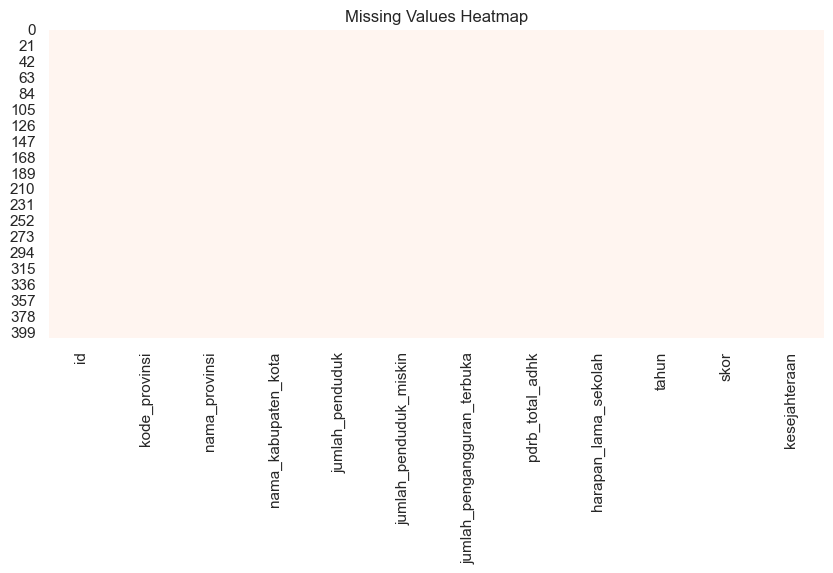

In [ ]:
# Missing values
missing = raw_df.isnull().sum().to_frame('missing_count')
missing['missing_pct'] = 100 * missing['missing_count'] / len(raw_df)
missing_sorted = missing.sort_values('missing_pct', ascending=False)
display(missing_sorted[missing_sorted['missing_count'] > 0])

plt.figure(figsize=(10,4))
sns.heatmap(raw_df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
dup_count = raw_df.duplicated().sum()
print(f"Jumlah duplikat: {dup_count}")

Jumlah duplikat: 0


,feature,outlier_count
5,pdrb_total_adhk,55
8,skor,55
4,jumlah_pengangguran_terbuka,17
2,jumlah_penduduk,15
3,jumlah_penduduk_miskin,13
6,harapan_lama_sekolah,3
0,id,0
1,kode_provinsi,0
7,tahun,0


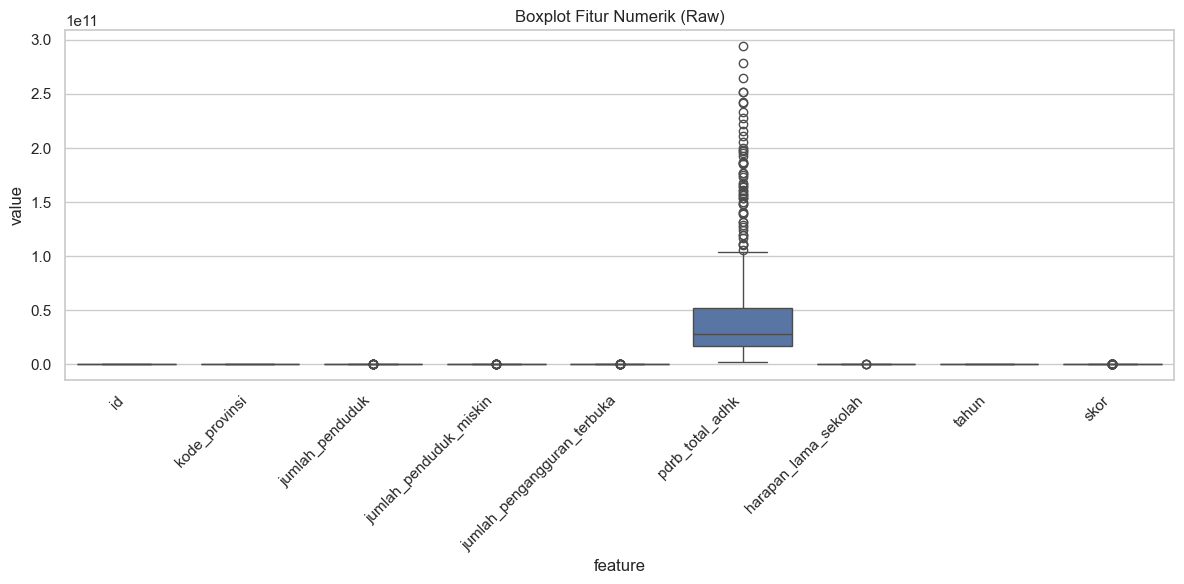

In [ ]:
num_cols_raw = raw_df.select_dtypes(exclude='object').columns

def iqr_bounds(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

outlier_counts = {}
for col in num_cols_raw:
    low, high = iqr_bounds(raw_df[col])
    outlier_counts[col] = int(((raw_df[col] < low) | (raw_df[col] > high)).sum())

outlier_df = pd.DataFrame({'feature': list(outlier_counts.keys()), 'outlier_count': list(outlier_counts.values())})
outlier_df = outlier_df.sort_values('outlier_count', ascending=False)
display(outlier_df)

plt.figure(figsize=(12,6))
raw_melt = raw_df[num_cols_raw].melt(var_name='feature', value_name='value')
sns.boxplot(data=raw_melt, x='feature', y='value')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot Fitur Numerik (Raw)')
plt.tight_layout()
plt.show()

## 3. Data Cleaning

In [ ]:
clean_df = raw_df.copy()

unnamed_cols = [c for c in clean_df.columns if 'unnamed' in c.lower()]
constant_cols = [c for c in ['kode_provinsi', 'nama_provinsi'] if c in clean_df.columns]
drop_targets = unnamed_cols + constant_cols
if drop_targets:
    clean_df.drop(columns=drop_targets, inplace=True)
    print(f"Dropped meta/unnamed columns: {drop_targets}")
else:
    print('No meta/unnamed columns to drop')

original_clean_cols = clean_df.columns.tolist()
clean_df.columns = clean_df.columns.str.strip()
clean_df.columns = clean_df.columns.str.lower()
clean_df.columns = clean_df.columns.str.replace(' ', '_')
clean_df.columns = clean_df.columns.str.replace('[^a-z0-9_]', '', regex=True)
clean_df.columns = clean_df.columns.str.replace('_+', '_', regex=True)

if any(o != n for o, n in zip(original_clean_cols, clean_df.columns)):
    print('Column name changes (post-clean):')
    for o, n in zip(original_clean_cols, clean_df.columns):
        if o != n:
            print(f"  '{o}' -> '{n}'")

assert not any('unnamed' in col.lower() for col in clean_df.columns), 'Unnamed columns still present after cleaning'

before_dup = len(clean_df)
clean_df = clean_df.drop_duplicates()
print(f"Duplikat dibuang: {before_dup - len(clean_df)}")
missing_after_drop = clean_df.isna().sum().sum()
print(f"Total missing setelah drop kolom meta: {missing_after_drop}")
print(f"Columns after cleaning: {clean_df.columns.tolist()}")

Dropped meta/unnamed columns: ['kode_provinsi', 'nama_provinsi']
Duplikat dibuang: 0
Total missing setelah drop kolom meta: 0
Columns after cleaning: ['id', 'nama_kabupaten_kota', 'jumlah_penduduk', 'jumlah_penduduk_miskin', 'jumlah_pengangguran_terbuka', 'pdrb_total_adhk', 'harapan_lama_sekolah', 'tahun', 'skor', 'kesejahteraan']


In [ ]:
# Outlier capping with IQR
capping_cols = ['jumlah_penduduk','jumlah_penduduk_miskin','jumlah_pengangguran_terbuka',
                'pdrb_total_adhk','harapan_lama_sekolah','skor']
capped_counts = {}
for col in capping_cols:
    q1, q3 = clean_df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    before = clean_df[col].copy()
    clean_df[col] = clean_df[col].clip(low, high)
    capped_counts[col] = int((before != clean_df[col]).sum())

print('Nilai ter-cap per kolom (awal):', capped_counts)

Nilai ter-cap per kolom (awal): {'jumlah_penduduk': 15, 'jumlah_penduduk_miskin': 13, 'jumlah_pengangguran_terbuka': 17, 'pdrb_total_adhk': 55, 'harapan_lama_sekolah': 3, 'skor': 55}


## 4. Feature Engineering
- Rasio: penduduk_miskin_ratio, pengangguran_ratio, pdrb_perkapita
- Encoding target ordinal: kesejahteraan_level (0–4)
- One-Hot Encoding: nama_kabupaten_kota → kabkota_*
- Drop kolom id (identifier)

In [ ]:
# Feature creation
clean_df['penduduk_miskin_ratio'] = clean_df['jumlah_penduduk_miskin'] / clean_df['jumlah_penduduk']
clean_df['pengangguran_ratio'] = clean_df['jumlah_pengangguran_terbuka'] / clean_df['jumlah_penduduk']
clean_df['pdrb_perkapita'] = clean_df['pdrb_total_adhk'] / clean_df['jumlah_penduduk']

ratio_cols = ['penduduk_miskin_ratio','pengangguran_ratio','pdrb_perkapita']
ratio_caps = {}
for col in ratio_cols:
    q1, q3 = clean_df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    before = clean_df[col].copy()
    clean_df[col] = clean_df[col].clip(low, high)
    ratio_caps[col] = int((before != clean_df[col]).sum())

target_order = ['Sangat Tidak Sejahtera','Tidak Sejahtera','Cukup','Sejahtera','Sangat Sejahtera']
target_map = {k: i for i, k in enumerate(target_order)}
clean_df['kesejahteraan_level'] = clean_df['kesejahteraan'].map(target_map)

clean_df = pd.get_dummies(clean_df, columns=['nama_kabupaten_kota'], prefix='kabkota')

if 'id' in clean_df.columns:
    clean_df = clean_df.drop(columns=['id'])

post_feat_original_cols = clean_df.columns.tolist()
clean_df.columns = clean_df.columns.str.strip()
clean_df.columns = clean_df.columns.str.lower()
clean_df.columns = clean_df.columns.str.replace(' ', '_')
clean_df.columns = clean_df.columns.str.replace('[^a-z0-9_]', '', regex=True)
clean_df.columns = clean_df.columns.str.replace('_+', '_', regex=True)

if any(o != n for o, n in zip(post_feat_original_cols, clean_df.columns)):
    print('Column name changes (post-feature engineering):')
    for o, n in zip(post_feat_original_cols, clean_df.columns):
        if o != n:
            print(f"  '{o}' -> '{n}'")

assert not any('unnamed' in col.lower() for col in clean_df.columns), 'Unnamed columns found after feature engineering'

print('Rasio ter-cap:', ratio_caps)
print('Jumlah kolom kabkota_*:', len([c for c in clean_df.columns if c.startswith('kabkota_')]))
print(f"Current columns count: {len(clean_df.columns)}")

Column name changes (post-feature engineering):
  'kabkota_BANDUNG' -> 'kabkota_bandung'
  'kabkota_BANDUNG BARAT' -> 'kabkota_bandung_barat'
  'kabkota_BEKASI' -> 'kabkota_bekasi'
  'kabkota_BOGOR' -> 'kabkota_bogor'
  'kabkota_CIAMIS' -> 'kabkota_ciamis'
  'kabkota_CIANJUR' -> 'kabkota_cianjur'
  'kabkota_CIREBON' -> 'kabkota_cirebon'
  'kabkota_GARUT' -> 'kabkota_garut'
  'kabkota_INDRAMAYU' -> 'kabkota_indramayu'
  'kabkota_KARAWANG' -> 'kabkota_karawang'
  'kabkota_KOTA BANDUNG' -> 'kabkota_kota_bandung'
  'kabkota_KOTA BANJAR' -> 'kabkota_kota_banjar'
  'kabkota_KOTA BEKASI' -> 'kabkota_kota_bekasi'
  'kabkota_KOTA BOGOR' -> 'kabkota_kota_bogor'
  'kabkota_KOTA CIMAHI' -> 'kabkota_kota_cimahi'
  'kabkota_KOTA CIREBON' -> 'kabkota_kota_cirebon'
  'kabkota_KOTA DEPOK' -> 'kabkota_kota_depok'
  'kabkota_KOTA SUKABUMI' -> 'kabkota_kota_sukabumi'
  'kabkota_KOTA TASIKMALAYA' -> 'kabkota_kota_tasikmalaya'
  'kabkota_KUNINGAN' -> 'kabkota_kuningan'
  'kabkota_MAJALENGKA' -> 'kabkota_maj

## 5. Data Transformation & Validation

Mid-check unnamed columns: []
Columns snapshot (39): ['jumlah_penduduk', 'jumlah_penduduk_miskin', 'jumlah_pengangguran_terbuka', 'pdrb_total_adhk', 'harapan_lama_sekolah', 'tahun', 'skor', 'kesejahteraan', 'penduduk_miskin_ratio', 'pengangguran_ratio', 'pdrb_perkapita', 'kesejahteraan_level', 'kabkota_bandung', 'kabkota_bandung_barat', 'kabkota_bekasi', 'kabkota_bogor', 'kabkota_ciamis', 'kabkota_cianjur', 'kabkota_cirebon', 'kabkota_garut', 'kabkota_indramayu', 'kabkota_karawang', 'kabkota_kota_bandung', 'kabkota_kota_banjar', 'kabkota_kota_bekasi', 'kabkota_kota_bogor', 'kabkota_kota_cimahi', 'kabkota_kota_cirebon', 'kabkota_kota_depok', 'kabkota_kota_sukabumi', 'kabkota_kota_tasikmalaya', 'kabkota_kuningan', 'kabkota_majalengka', 'kabkota_pangandaran', 'kabkota_purwakarta', 'kabkota_subang', 'kabkota_sukabumi', 'kabkota_sumedang', 'kabkota_tasikmalaya']
jumlah_penduduk                float64
jumlah_penduduk_miskin           int64
jumlah_pengangguran_terbuka    float64
pdrb_total_ad

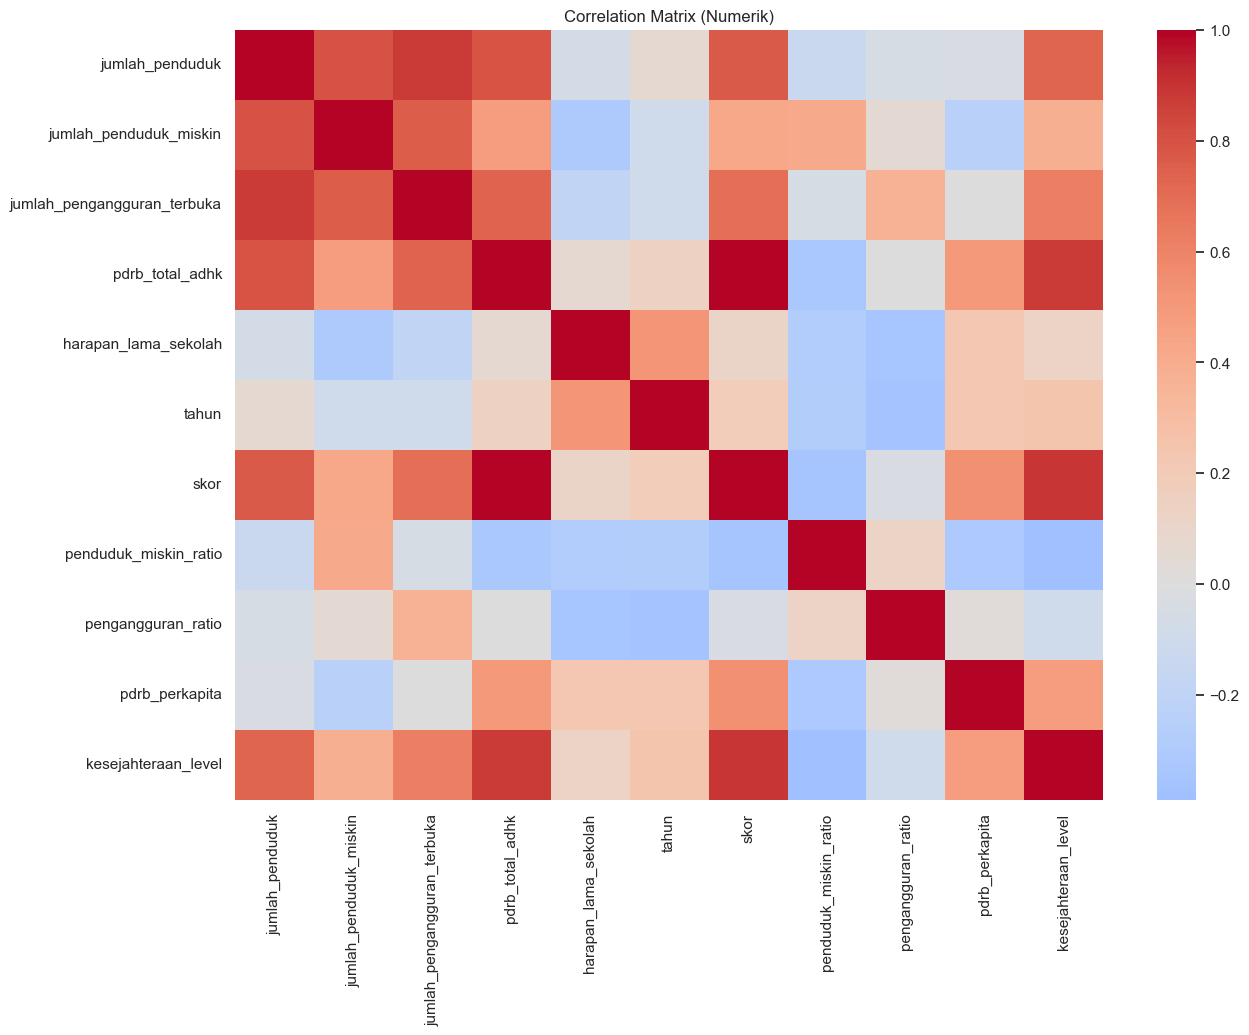


Fitur yang perlu scaling di fase modeling: ['jumlah_penduduk', 'jumlah_penduduk_miskin', 'jumlah_pengangguran_terbuka', 'pdrb_total_adhk', 'harapan_lama_sekolah', 'skor', 'penduduk_miskin_ratio', 'pengangguran_ratio', 'pdrb_perkapita']


In [ ]:
mid_unnamed = [c for c in clean_df.columns if 'unnamed' in c.lower()]
print(f"Mid-check unnamed columns: {mid_unnamed}")
assert not mid_unnamed, f'Unexpected unnamed columns mid-pipeline: {mid_unnamed}'
print(f"Columns snapshot ({len(clean_df.columns)}): {clean_df.columns.tolist()}")


print(clean_df.dtypes)

# Mi check
print('\nTotal missing:', clean_df.isna().sum().sum())
print('Duplicates:', clean_df.duplicated().sum())

# Target distribution
print('\nDistribusi target (kesejahteraan):')
print(clean_df['kesejahteraan'].value_counts())
print('\nDistribusi target (proporsi):')
print(clean_df['kesejahteraan'].value_counts(normalize=True))

# Correlation matrix (numerik saja)
num_cols_final = clean_df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(14,10))
corr = clean_df[num_cols_final].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numerik)')
plt.show()

# Fitur yang perlu scaling nanti
scale_candidates = ['jumlah_penduduk','jumlah_penduduk_miskin','jumlah_pengangguran_terbuka',
                    'pdrb_total_adhk','harapan_lama_sekolah','skor',
                    'penduduk_miskin_ratio','pengangguran_ratio','pdrb_perkapita']
print('\nFitur yang perlu scaling di fase modeling:', scale_candidates)

## 6. Save Preprocessed Data

In [ ]:
print('\n' + '='*60)
print('FINAL DATASET VALIDATION')
print('='*60)
print(f"Shape: {clean_df.shape}")
print(f"Columns ({len(clean_df.columns)}): {clean_df.columns.tolist()}")
print(f"Missing values: {clean_df.isnull().sum().sum()}")
print(f"Duplicates: {clean_df.duplicated().sum()}")

unnamed_final = [col for col in clean_df.columns if 'unnamed' in col.lower()]
if unnamed_final:
    print(f"⚠️ WARNING: Found unnamed columns: {unnamed_final}")
else:
    print('✓ No unnamed columns - Dataset is clean!')

print('Data types:')
print(clean_df.dtypes)

print('\nSaving preprocessed data...')
clean_df.to_csv(OUTPUT_PATH, index=False)
print(f"✓ Saved to: {OUTPUT_PATH.resolve()}")

print('\nVerifying saved file...')
df_verify = pd.read_csv(OUTPUT_PATH, index_col=False)
print(f"Verified shape: {df_verify.shape}")
print(f"Verified columns: {df_verify.columns.tolist()}")
unnamed_in_saved = [col for col in df_verify.columns if 'unnamed' in col.lower()]
assert len(unnamed_in_saved) == 0, f"Saved file has unnamed columns: {unnamed_in_saved}"
print('✓ Saved file is clean - no unnamed columns')



FINAL DATASET VALIDATION
Shape: (405, 39)
Columns (39): ['jumlah_penduduk', 'jumlah_penduduk_miskin', 'jumlah_pengangguran_terbuka', 'pdrb_total_adhk', 'harapan_lama_sekolah', 'tahun', 'skor', 'kesejahteraan', 'penduduk_miskin_ratio', 'pengangguran_ratio', 'pdrb_perkapita', 'kesejahteraan_level', 'kabkota_bandung', 'kabkota_bandung_barat', 'kabkota_bekasi', 'kabkota_bogor', 'kabkota_ciamis', 'kabkota_cianjur', 'kabkota_cirebon', 'kabkota_garut', 'kabkota_indramayu', 'kabkota_karawang', 'kabkota_kota_bandung', 'kabkota_kota_banjar', 'kabkota_kota_bekasi', 'kabkota_kota_bogor', 'kabkota_kota_cimahi', 'kabkota_kota_cirebon', 'kabkota_kota_depok', 'kabkota_kota_sukabumi', 'kabkota_kota_tasikmalaya', 'kabkota_kuningan', 'kabkota_majalengka', 'kabkota_pangandaran', 'kabkota_purwakarta', 'kabkota_subang', 'kabkota_sukabumi', 'kabkota_sumedang', 'kabkota_tasikmalaya']
Missing values: 0
Duplicates: 0
✓ No unnamed columns - Dataset is clean!
Data types:
jumlah_penduduk                float64
ju

## 7. Preprocessing Summary & Notes for Modeling

In [ ]:
final_shape = clean_df.shape
cols_dropped = unnamed_cols + constant_cols + ['id']
outlier_summary = {**capped_counts, **ratio_caps}
notes = f"""
### Ringkasan
- Data awal: {orig_shape[0]} baris, {orig_shape[1]} kolom
- Data akhir: {final_shape[0]} baris, {final_shape[1]} kolom
- Kolom di-drop: {cols_dropped}
- Missing setelah cleaning: {clean_df.isna().sum().sum()}
- Duplikat setelah cleaning: {clean_df.duplicated().sum()}
- Outlier dicapping (jumlah nilai terpengaruh per fitur): {outlier_summary}
- Encoding:
  - Target ordinal -> kesejahteraan_level (0=sangat tidak sejahtera ... 4=sangat sejahtera)
  - One-Hot kabupaten/kota: {len([c for c in clean_df.columns if c.startswith('kabkota_')])} kolom
- Fitur baru: penduduk_miskin_ratio, pengangguran_ratio, pdrb_perkapita
- Fitur di-drop untuk modeling: id (identifier), kolom meta/provinsi
- Rekomendasi fase 3:
  - Lakukan train-test split & k-fold
  - Scaling/standardization untuk fitur numerik kontinu
  - Tangani class imbalance jika perlu (cek distribusi di atas)
  - Cek multicollinearity (VIF) dan feature importance di model
"""

display(Markdown(notes))


### Ringkasan
- Data awal: 405 baris, 17 kolom
- Data akhir: 405 baris, 39 kolom
- Kolom di-drop: ['kode_provinsi', 'nama_provinsi', 'id']
- Missing setelah cleaning: 0
- Duplikat setelah cleaning: 0
- Outlier dicapping (jumlah nilai terpengaruh per fitur): {'jumlah_penduduk': 15, 'jumlah_penduduk_miskin': 13, 'jumlah_pengangguran_terbuka': 17, 'pdrb_total_adhk': 55, 'harapan_lama_sekolah': 3, 'skor': 55, 'penduduk_miskin_ratio': 8, 'pengangguran_ratio': 17, 'pdrb_perkapita': 3}
- Encoding:
  - Target ordinal -> kesejahteraan_level (0=sangat tidak sejahtera ... 4=sangat sejahtera)
  - One-Hot kabupaten/kota: 27 kolom
- Fitur baru: penduduk_miskin_ratio, pengangguran_ratio, pdrb_perkapita
- Fitur di-drop untuk modeling: id (identifier), kolom meta/provinsi
- Rekomendasi fase 3:
  - Lakukan train-test split & k-fold
  - Scaling/standardization untuk fitur numerik kontinu
  - Tangani class imbalance jika perlu (cek distribusi di atas)
  - Cek multicollinearity (VIF) dan feature importance di model
